# HAKAN AKSOY

## IBM Analyzing Historical Stock/Revenue Data and Building a Dashboard PROJECT

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### Use yfinance to Extract Stock Data

Reset the index, save, and display the <strong>first five (5) rows</strong> of the <strong> tesla_data dataframe  </strong> using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [4]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


#### Use Webscraping to Extract Tesla Revenue Data

Display the <strong> <i>last</i> five rows</strong> of the <strong>tesla_revenue dataframe</strong> using the tail function. Upload a screenshot of the results.

In [8]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html5lib")
tesla_revenue = pd.DataFrame(columns = ["Date","Revenue"])
for table in soup.find_all('table'):
    if table.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
            tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
            tesla_revenue.dropna(axis=0, how='all', subset=['Revenue'])
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail(5)

,Date,Revenue
49,2010-09-30,31
50,2010-06-30,28
51,2010-03-31,21
53,2009-09-30,46
54,2009-06-30,27


#### Use yfinance to Extract Stock Data

Reset the index, save, and display the <strong>first five rows</strong> of the <strong>gme_data dataframe</strong> using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [9]:
gme = yf.Ticker('GME')
gme_data = gme.history(period = "max")
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


#### Use Webscraping to Extract GME Revenue Data

Display the <strong><italic>last</italic> five rows</strong> of the <strong>gme_revenue dataframe</strong> using the tail function. Upload a screenshot of the results.

In [24]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data=requests.get(url).text
soup = BeautifulSoup(html_data, "html5lib")
gme_revenue = pd.DataFrame(columns = ["Date","Revenue"])

In [28]:
for table in soup.find_all('table'):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
            gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [27]:
gme_revenue.tail(5)

,Date,Revenue
109,2010-01-31,3524
110,2009-10-31,1835
111,2009-07-31,1739
112,2009-04-30,1981
113,2009-01-31,3492


#### Plot Tesla Stock Graph

Use the <strong>make_graph</strong> function to <strong>graph</strong> the <strong>Tesla Stock Data</strong>, also provide a title for the graph.

Upload a screenshot of your results.

In [30]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

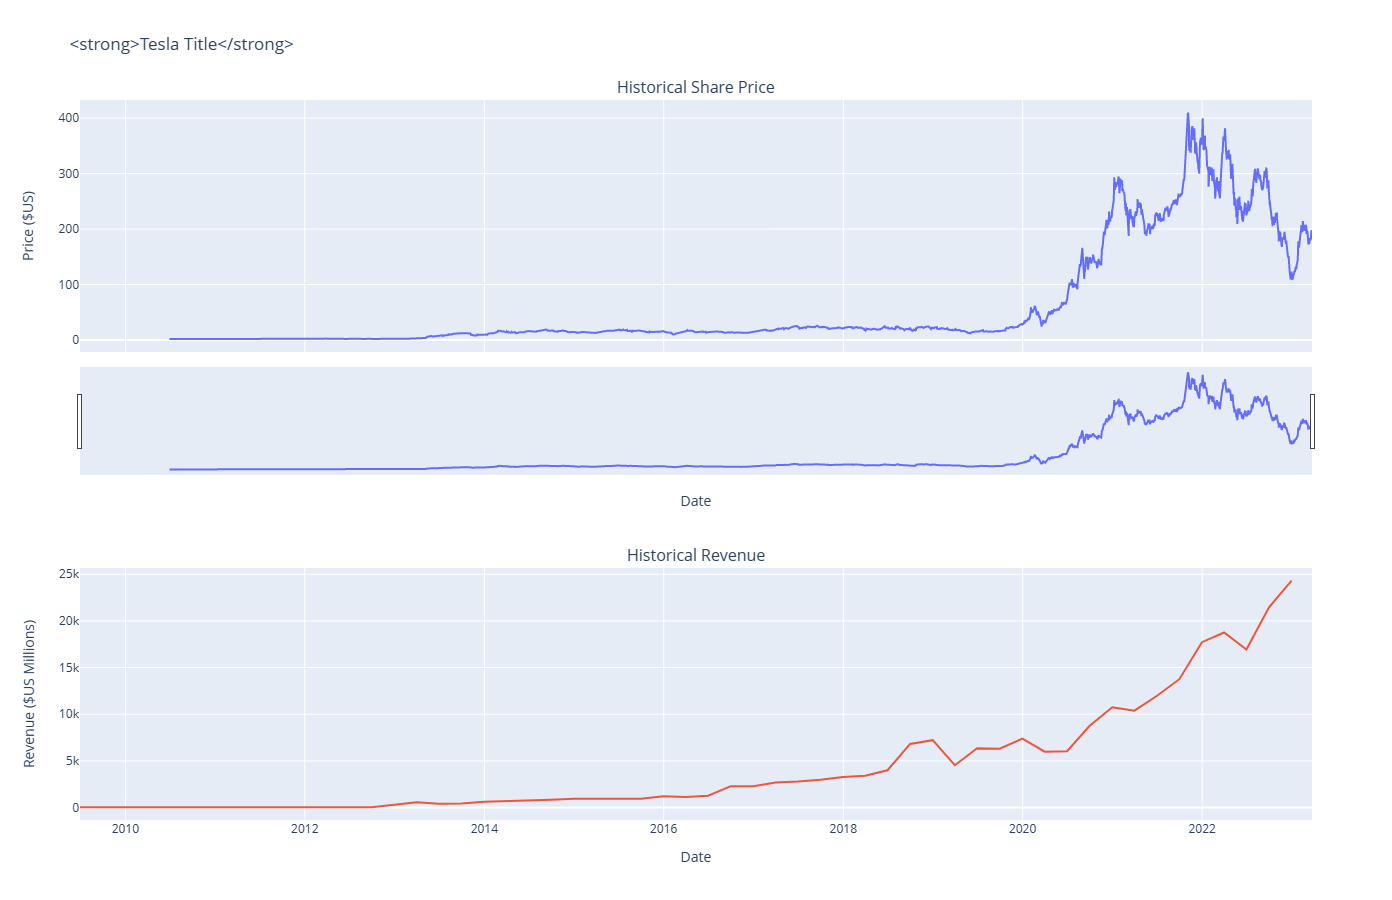

In [32]:
make_graph(tesla_data, tesla_revenue, '<strong>Tesla Title</strong>')

#### Plot GameStop Stock Graph

Use the <strong>make_graph</strong> function to <strong>graph</strong> the <strong>GameStop Stock Data</strong>, also provide a title for the graph.

Upload a screenshot of your results.

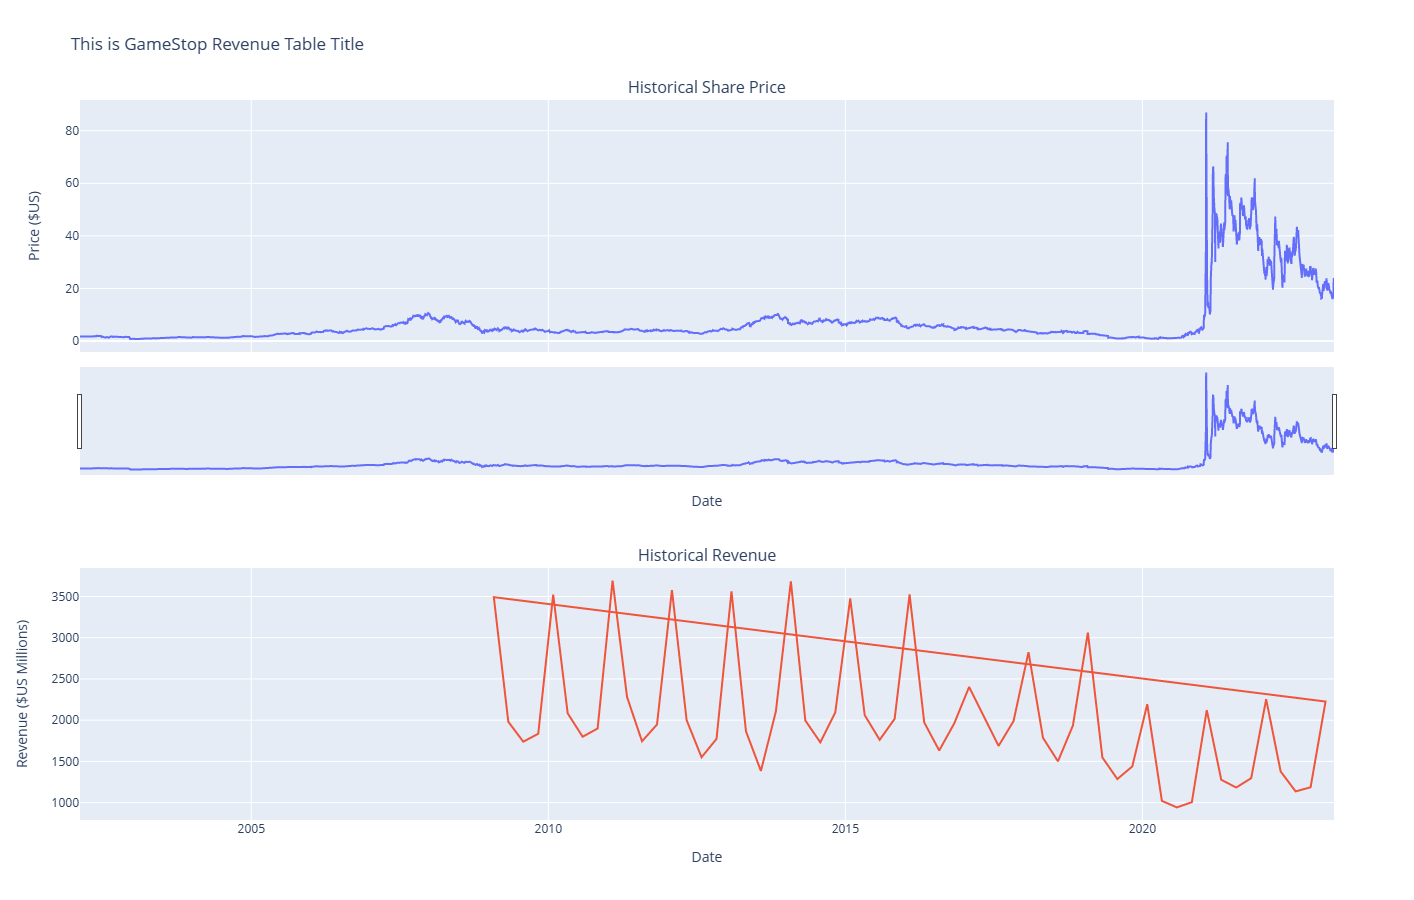

In [34]:
make_graph(gme_data, gme_revenue, 'This is GameStop Revenue Table Title')